### Test Check PySpark

In [1]:

import os 
os.environ['PYSPARK_PYTHON'] = '/usr/bin/python3.7'
os.environ['PYSPARK_DRIVER_PYTHON'] = '/usr/bin/python3.7'

In [2]:

def check():
  try:  
    from pyspark import SparkContext
    sc = SparkContext("local", "First App")
    logFile = "file:///home2/ead2020/SEM2/juan.manoel/shakespeare.txt"
    logData = sc.textFile(logFile).cache()
    numAs = logData.filter(lambda s: 'a' in s).count()
    return "PySpark its OK !!! " if type(numAs) == int else "FAIL PySpark !!!"
  except ValueError as e:
    print("FAIL")    
        

In [3]:
check()

'PySpark its OK !!! '

True

## Analise Exploratoria ATP Dataset



## Dicionario de Dados

O dicionário de dados deste dataset é declarado a seguir:
Campo 	

| Campo | DESCRIÇÃO |
|-------|-----------|
| Dia   |  Dia da ocorrência     |
| Mes   |  Mes da ocorrência     |
| Ano   |  Ano da ocorrência     |
| Bloco |Região da ocorrência  |   Região da ocorrência 
| Tipo  |  Tipo da ocorrência criminal 
| Descrição |   Breve descrição da ocorrência 
| Descrição da localização | Descrição da localização da ocorrência (rua, por exemplo) 
| Latitude |   Localização da ocorrência 
| Longitude |  Localização da ocorrência 

In [218]:
from os import chdir 

In [40]:
#!pip3 install matplotlib

%matplotlib inline 
import matplotlib.pyplot as plt


In [219]:
chdir("/home/Disciplinas/Frameworks/spark")

In [21]:
ocorrencias_criminais = "file:///home/Disciplinas/Frameworks/sparkoc/ocorrencias_criminais.csv"
#logData_ocorrencias = sc.textFile(ocorrencias_criminais).cache()

In [220]:
import pandas as pd
filename = "ocorrencias_criminais.csv"
header_list = [
    "Dia", 
    "Mes",
    "Ano",
    "Bloco",
    "Tipo",
    "Descricao",
    "Descrição_da_localizacao",
    "Latitude",
    "Longitude",
]
df = pd.read_csv(filename, sep=';', names=header_list, low_memory=False)

In [221]:
df.head()

,Dia,Mes,Ano,Bloco,Tipo,Descricao,Descrição_da_localizacao,Latitude,Longitude
0,18,3,2015,047XX W OHIO ST,BATTERY,AGGRAVATED: HANDGUN,STREET,41.891398861,-87.744384567
1,18,3,2015,066XX S MARSHFIELD AVE,OTHER OFFENSE,PAROLE VIOLATION,STREET,41.773371528,-87.665319468
2,18,3,2015,044XX S LAKE PARK AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,41.81386068,-87.596642837
3,18,3,2015,051XX S MICHIGAN AVE,BATTERY,SIMPLE,APARTMENT,41.800802415,-87.622619343
4,18,3,2015,047XX W ADAMS ST,ROBBERY,ARMED: HANDGUN,SIDEWALK,41.878064761,-87.743354013


In [12]:
df.shape

(6705412, 9)

In [223]:
!pwd

/home/Disciplinas/Frameworks/spark


In [224]:
#.to_csv("~/Ocorrencias_criminais.csv", index=False)

In [228]:
df_n = pd.read_csv("~/Ocorrencias_criminais.csv",  low_memory=False)

In [229]:
df_n.head()

,Dia,Mes,Ano,Bloco,Tipo,Descricao,Descrição_da_localizacao,Latitude,Longitude
0,18,3,2015,047XX W OHIO ST,BATTERY,AGGRAVATED: HANDGUN,STREET,41.891398861,-87.744384567
1,18,3,2015,066XX S MARSHFIELD AVE,OTHER OFFENSE,PAROLE VIOLATION,STREET,41.773371528,-87.665319468
2,18,3,2015,044XX S LAKE PARK AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,41.81386068,-87.596642837
3,18,3,2015,051XX S MICHIGAN AVE,BATTERY,SIMPLE,APARTMENT,41.800802415,-87.622619343
4,18,3,2015,047XX W ADAMS ST,ROBBERY,ARMED: HANDGUN,SIDEWALK,41.878064761,-87.743354013


In [44]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 32.9 MB/s eta 0:00:01                         | 1.2 MB 32.9 MB/s eta 0:00:01��███▍                          | 4.3 MB 32.9 MB/s eta 0:00:01        | 6.7 MB 32.9 MB/s eta 0:00:01              | 9.4 MB 32.9 MB/s eta 0:00:0100:01�████████▊           | 16.7 MB 32.9 MB/s eta 0:00:01 32.9 MB/s eta 0:00:01�█████████████████████████▋| 25.5 MB 32.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [127]:
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

## Quantidade de crimes por ano?


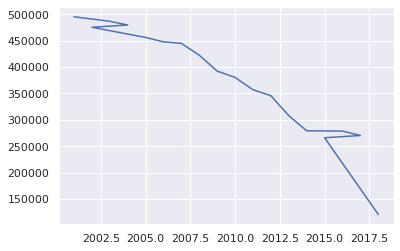

In [68]:
#df['Ano'].plot()
df['Ano'].value_counts().plot();

## Quantidade de crimes por ano que sejam do tipo NARCOTICS?


In [72]:
narcoticos = df[['Ano','Tipo']]

In [79]:
narcoticos['Tipo'].value_counts()

THEFT                                1406756
BATTERY                              1226120
CRIMINAL DAMAGE                       771496
NARCOTICS                             710592
OTHER OFFENSE                         416726
ASSAULT                               415668
BURGLARY                              387774
MOTOR VEHICLE THEFT                   313278
ROBBERY                               254092
DECEPTIVE PRACTICE                    252350
CRIMINAL TRESPASS                     193172
WEAPONS VIOLATION                      69356
PROSTITUTION                           68898
PUBLIC PEACE VIOLATION                 47578
OFFENSE INVOLVING CHILDREN             43086
CRIM SEXUAL ASSAULT                    25446
SEX OFFENSE                            24098
INTERFERENCE WITH PUBLIC OFFICER       14830
GAMBLING                               14642
LIQUOR LAW VIOLATION                   13906
ARSON                                  11122
HOMICIDE                                9200
KIDNAPPING

In [89]:
narcoticos[narcoticos['Tipo'] == 'NARCOTICS'].value_counts()

Ano   Tipo     
2004  NARCOTICS    58500
2005  NARCOTICS    57266
2006  NARCOTICS    55966
2007  NARCOTICS    55936
2003  NARCOTICS    55342
2001  NARCOTICS    50996
2002  NARCOTICS    50086
2008  NARCOTICS    45876
2010  NARCOTICS    44344
2009  NARCOTICS    42708
2011  NARCOTICS    38916
2012  NARCOTICS    36490
2013  NARCOTICS    34778
2014  NARCOTICS    29752
2015  NARCOTICS    21986
2016  NARCOTICS    13988
2017  NARCOTICS    11902
2018  NARCOTICS     5760
dtype: int64

## Quantidade de crimes por ano que sejam do tipo NARCOTICS e tenham ocorrido em dias pares?


In [95]:
narcoticos_dia_par = df[['Ano','Tipo','Dia']]

In [100]:
just_narco = narcoticos_dia_par[narcoticos_dia_par['Tipo'] == 'NARCOTICS']

In [111]:
just_narco_par = just_narco[just_narco['Dia'] % 2 == 0]

In [119]:
just_narco_par[['Tipo','Ano']].value_counts()

Tipo       Ano 
NARCOTICS  2004    28296
           2007    27736
           2006    27648
           2005    27610
           2003    26726
           2001    24732
           2002    24610
           2008    22302
           2010    21632
           2009    20894
           2011    19330
           2012    17884
           2013    16822
           2014    14644
           2015    10746
           2016     6690
           2017     5732
           2018     2678
dtype: int64

In [120]:
just_narco_par.value_counts()

Ano   Tipo       Dia
2005  NARCOTICS  2      2216
2004  NARCOTICS  6      2154
2003  NARCOTICS  16     2138
2007  NARCOTICS  10     2130
2003  NARCOTICS  6      2118
                        ... 
2018  NARCOTICS  16      156
                 18      152
                 28      150
                 24      140
                 30      120
Length: 270, dtype: int64

## Mês com maior ocorrência de crimes?


In [122]:
df.head()

,Dia,Mes,Ano,Bloco,Tipo,Descricao,Descrição_da_localizacao,Latitude,Longitude
0,18,3,2015,047XX W OHIO ST,BATTERY,AGGRAVATED: HANDGUN,STREET,41.891398861,-87.744384567
1,18,3,2015,066XX S MARSHFIELD AVE,OTHER OFFENSE,PAROLE VIOLATION,STREET,41.773371528,-87.665319468
2,18,3,2015,044XX S LAKE PARK AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,41.81386068,-87.596642837
3,18,3,2015,051XX S MICHIGAN AVE,BATTERY,SIMPLE,APARTMENT,41.800802415,-87.622619343
4,18,3,2015,047XX W ADAMS ST,ROBBERY,ARMED: HANDGUN,SIDEWALK,41.878064761,-87.743354013


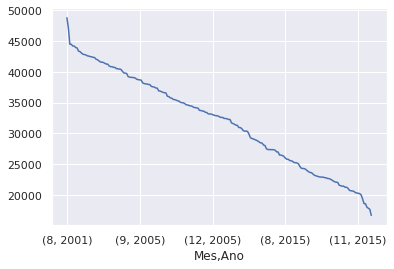

In [126]:
df[['Mes','Ano']].value_counts().plot();

In [204]:
df[['Mes','Ano']].value_counts()

Mes  Ano 
8    2001    48812
     2004    47138
     2003    44514
7    2003    44486
     2004    44216
             ...  
1    2014    18574
2    2018    18012
     2014    17848
6    2018    17664
2    2015    16674
Length: 210, dtype: int64

In [206]:
df[['Mes','Ano']].value_counts().max()

48812

## Mês com a maior média de ocorrência de crimes?


In [210]:
df[['Mes','Ano']]

,Mes,Ano
0,3,2015
1,3,2015
2,3,2015
3,3,2015
4,3,2015
...,...,...
6705407,2,2018
6705408,1,2018
6705409,1,2018
6705410,2,2018


## Mês por ano com a maior ocorrência de crimes?


## Mês com a maior ocorrência de crimes do tipo DECEPTIVE PRACTICE?


## Dia do ano com a maior ocorrência de crimes?
